# Heterogeneity study

We study the results from notebook 2, and will try to emphasize heterogeities in the result. We will also conduct some tests to test the strength of our results. 

In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from os import path

In [2]:
# Data folders
data_folder = "data/" 
result_folder = "results/"

In [4]:
df = pd.read_csv( path.join( result_folder, 'AR.csv'))
df = df.drop_duplicates(subset = ['ISIN'])

# We only keep the anormal returns, not the errors
def is_float(str):
    try :
        float(str)
        return True
    except :
        return False

filter = np.all([[is_float(df[f'AR_{2*j}'].iloc[i]) for i in range(len(df))] for j in range(2,11)], axis = 0)
df = df[filter]
df[ df.columns[1:] ] = df[ df.columns[1:] ].apply(pd.to_numeric)
#print(df.iloc[0][2::2])

### Strength test

The main source of error with the market model is that the anormal return may vary with the time window used for the linear regression. We have : $AR = AR(i,t)$ where i is the event and t is the time window used for the linear regression. Here we want to see if we can define an anormal return so that $AR = AR(i)$. Morerover, we want see if 
$AR(i) = \mathbb{E} (AR(i,t))$ could be relevant.

We will study the disparities in our results to see if they depend or not of the time period used for the linear regression. We want to see if the anormal return that has the best regression score is close or not of the average anormal return for one firm. We also want to see the standard deviation of our results. The goal is to see if it can be releavant to keep the average anormal return for each firm for further studies.

In [7]:
# anormal return with the best regression score
def max(i):
    l = np.array(df.iloc[i][2::2]) # all regressions scores
    j = np.argmax(l)
    ar_max_score = df.iloc[i][1 + 2*j] # corresponding AR
    return j , l[j], ar_max_score

# Informations given by regression scores
max_score = np.array([ max(i)[1] for i in range(len(df))])
max_score_i = np.array([max(i)[0] for i in range(len(df))])
AR_max_score = np.array([max(i)[2] for i in range(len(df))])

# Average and standard deviation
AR_moyen = np.array([ np.mean(df.iloc[i][1::2]) for i in range(len(df))])
Sigma = np.array([np.std(df.iloc[i][1::2]) for i in range(len(df))])

print(f'Average standart deviation : {np.mean(Sigma)}')

Average standart deviation : 1.1306052868782135


We will compare the average anormal return with the anormal return with the best regression score. Using the average return can also reduce the errors. 

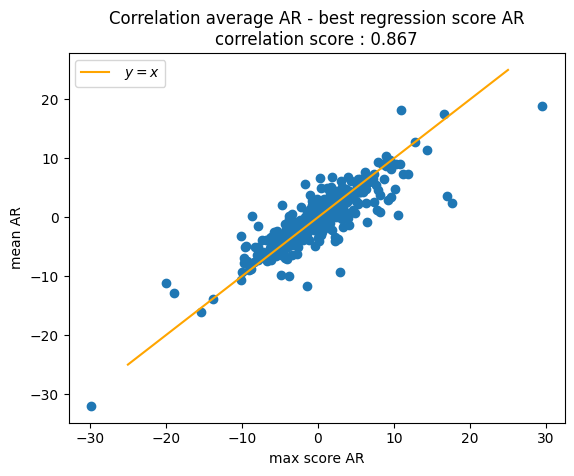

In [18]:
plt.figure()
plt.scatter(AR_max_score,  AR_moyen)
plt.plot([-25, 25] , [-25, 25] , color ='orange', label = ' $y = x$')
plt.xlabel('max score AR')
plt.ylabel('mean AR')
plt.title('Correlation average AR - best regression score AR' + '\n'
          + f'correlation score : { np.round(np.corrcoef(AR_max_score, AR_moyen)[0][1] , 3)}')
plt.legend()
#plt.savefig(path.join(result_folder, 'correlation.png'))
plt.show();


There is a strong correlation betwenn the two considered anormal returns, we will focus on $AR(i) = \mathbb{E}(AR(i,t))$


### Result study

In [19]:
print(f'average anormal return : {np.mean(AR_max_score)} %')

average anormal return : -0.03783733527621371 %


The first we notice is that the global effect is **negative**, but close to 0 $( \approx 0.5 \%)$

We will now try to reveal heterogenities

In [20]:
# We will need more informations about the companies
info = pd.read_csv(path.join(data_folder, 'info.csv') , sep =';', encoding= 'latin_1',
                   names = ['name' , 'ISIN' , 'Lei' , 'Country' , 'Continent',
                            'sector' , 'type']) 


info = info.drop_duplicates(subset = ['ISIN'])
info = info[info['ISIN'].notna()].set_index('ISIN')


In [21]:
# Sectors and types
isin = np.array(df['ISIN'])
sector = np.array([info.loc[i]['sector'] for i in isin])
company_type = np.array([info.loc[i]['type'] for i in isin])

# Informations données par les scores des régresions linéaires
max_score = np.array([ max(i)[1] for i in range(len(df))])
max_score_i = np.array([max(i)[0] for i in range(len(df))])
AR_max_score = np.array([max(i)[2] for i in range(len(df))])

# Moyenne et écart-type
AR_moyen = np.array([ np.mean(df.iloc[i][2::2]) for i in range(len(df))])
Sigma = np.array([np.std(df.iloc[i][2::2]) for i in range(len(df))])